In [318]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [319]:
df_train_5000eps = pd.read_csv("train_5000eps.csv")
df_train_10000eps_all = pd.read_csv("train_10000eps.csv")
df_train_10000eps_discriminative_all = pd.read_csv("train_10000eps_discriminative.csv")
df_train_10000eps_discriminative_all.head(5)

,timestamp,name,seed,total_steps,episode,episode_steps,reward,distance,velocity,game_time,...,flag,loss,epsilon,model_id,ewm_reward,ewm_wins,ewm_reward_001,ewm_wins_001,ewm_reward_01,ewm_wins_01
0,2024-05-30 18:12:21.296,game_episodes,13,102,1,102,598.0,675,33.750000,380,...,False,3.855238,0.999661,C1-ext-ni,598.000000,0.0,598.000000,0.0,598.000000,0.0
1,2024-05-30 18:12:48.288,game_episodes,13,1135,2,1033,637.0,898,4.359223,194,...,False,0.513779,0.995642,C1-ext-ni,617.500975,0.0,617.509755,0.0,617.597990,0.0
2,2024-05-30 18:13:23.794,game_episodes,13,2499,3,1364,799.0,1127,4.143382,128,...,False,0.187238,0.990359,C1-ext-ni,678.006700,0.0,678.067040,0.0,678.674051,0.0
3,2024-05-30 18:13:52.484,game_episodes,13,3572,4,1073,856.0,1126,5.261682,186,...,False,0.785768,0.986223,C1-ext-ni,722.511701,0.0,722.617061,0.0,723.676080,0.0
4,2024-05-30 18:14:20.814,game_episodes,13,4624,5,1052,1406.0,1672,7.961905,190,...,False,0.593463,0.982185,C1-ext-ni,859.236703,0.0,859.567275,0.0,862.897589,0.0


In [320]:
# clean up model_ids
df_train_5000eps.loc[df_train_5000eps["model_id"] == "baseline_original", "model_id"] = 'True Baseline'
df_train_5000eps.loc[df_train_5000eps["model_id"] == "baseline_B2", "model_id"] = 'Slow Decay Baseline'
df_train_5000eps.loc[df_train_5000eps["model_id"] == "target_T2", "model_id"] = 'Constrained Target (i)'
df_train_5000eps.loc[df_train_5000eps["model_id"] == "P1_compact", "model_id"] = 'Permissive Agent'
df_train_5000eps.loc[df_train_5000eps["model_id"] == "C1", "model_id"] = 'Constrained Agent (i)'
df_train_5000eps.loc[df_train_5000eps["model_id"] == "T1", "model_id"] = 'Permissive Target'


In [321]:
df_train_10000eps_all.loc[df_train_10000eps_all["model_id"] == "B1-long", "model_id"] = 'True Baseline'
df_train_10000eps_all.loc[df_train_10000eps_all["model_id"] == "B2-long", "model_id"] = 'Slow Decay Baseline'
df_train_10000eps_all.loc[df_train_10000eps_all["model_id"] == "P1", "model_id"] = 'Permissive Agent'
df_train_10000eps_all.loc[df_train_10000eps_all["model_id"] == "T1-ni", "model_id"] = 'Permissive Target'
df_train_10000eps_all.loc[df_train_10000eps_all["model_id"] == "C1-ni", "model_id"] = 'Constrained Agent'
df_train_10000eps_all.loc[df_train_10000eps_all["model_id"] == "T2_ni", "model_id"] = 'Constrained Target'

In [322]:
df_train_10000eps_discriminative_all.loc[df_train_10000eps_discriminative_all["model_id"] == "B1-long", "model_id"] = 'True Baseline'
df_train_10000eps_discriminative_all.loc[df_train_10000eps_discriminative_all["model_id"] == "B2-long", "model_id"] = 'Slow Decay Baseline'
df_train_10000eps_discriminative_all.loc[df_train_10000eps_discriminative_all["model_id"] == "C1-ext-ni", "model_id"] = 'Pipeless Constrained Agent'
df_train_10000eps_discriminative_all.loc[df_train_10000eps_discriminative_all["model_id"] == "P1_ext_ni", "model_id"] = 'Pipeless Permissive Agent'
df_train_10000eps_discriminative_all.loc[df_train_10000eps_discriminative_all["model_id"] == "T1_ext_ni", "model_id"] = 'Pipeless Permissive Target'
df_train_10000eps_discriminative_all.loc[df_train_10000eps_discriminative_all["model_id"] == "T2_ext_ni", "model_id"] = 'Pipeless Constrained Target'

In [323]:
# drop the rows from B1 and B2 with episodes > 10000. These will return later
df_train_10000eps = df_train_10000eps_all[df_train_10000eps_all['episode'] <= 10000]
df_train_10000eps_discriminative = df_train_10000eps_discriminative_all[df_train_10000eps_discriminative_all['episode'] <= 10000]

In [324]:
sns.set(font_scale=0.9)
sns.set_style("whitegrid")

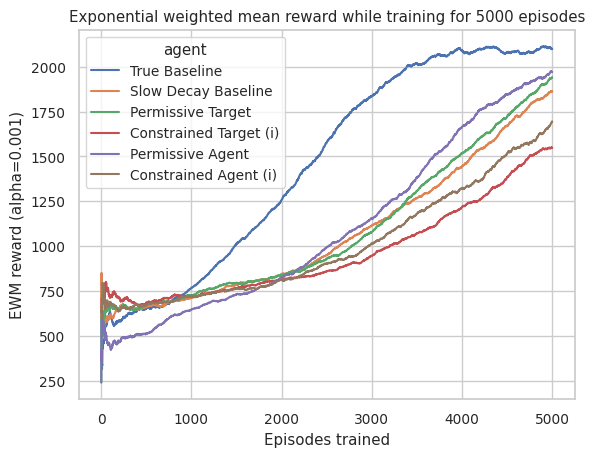

In [325]:
sns.lineplot(x='episode', 
             y='ewm_reward_001', 
             data=df_train_5000eps, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Permissive Target', 'Constrained Target (i)', 'Permissive Agent', 'Constrained Agent (i)']
             ).set(xlabel="Episodes trained", ylabel="EWM reward (alpha=0.001)")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.legend(title='agent')
plt.savefig("./training_rewards_5K.png", bbox_inches='tight')
#plt.title(label="Exponential weighted mean reward while training for 5000 episodes", loc='center', wrap=True)
#plt.savefig("./training_rewards_5K.pdf", format='pdf', bbox_inches='tight')

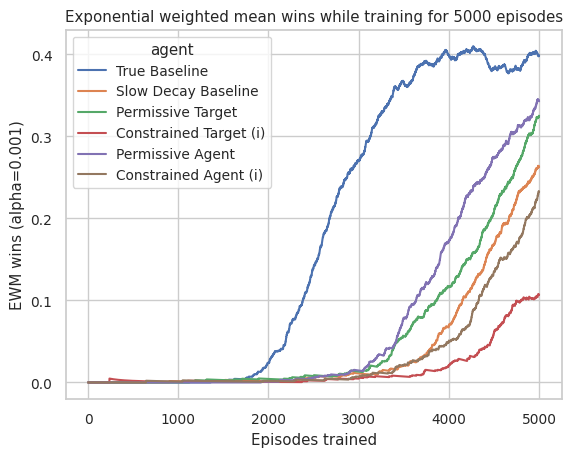

In [326]:
sns.lineplot(x='episode', 
             y='ewm_wins_001', 
             data=df_train_5000eps, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Permissive Target', 'Constrained Target (i)', 'Permissive Agent', 'Constrained Agent (i)']
             ).set(xlabel="Episodes trained", ylabel="EWM wins (alpha=0.001)")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend(title='agent')
plt.savefig("./training_wins_5K.png", bbox_inches='tight')
#plt.title(label="Exponential weighted mean wins while training for 5000 episodes", loc='center', wrap=True)
#plt.savefig("./training_wins_5K.pdf", format='pdf', bbox_inches='tight')

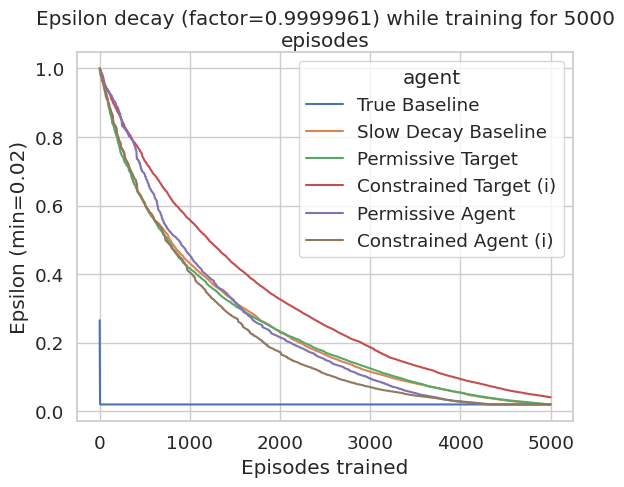

In [327]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.lineplot(x='episode', 
             y='epsilon', 
             data=df_train_5000eps, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Permissive Target', 'Constrained Target (i)', 'Permissive Agent', 'Constrained Agent (i)']
             ).set(xlabel="Episodes trained", ylabel="Epsilon (min=0.02)")
plt.legend(title='agent')
plt.savefig("./training_decay_5K.png", bbox_inches='tight')
#plt.title(label="Epsilon decay (factor=0.9999961) while training for 5000 episodes", loc='center', wrap=True)
#plt.savefig("./training_decay_5K.pdf", format='pdf', bbox_inches='tight')

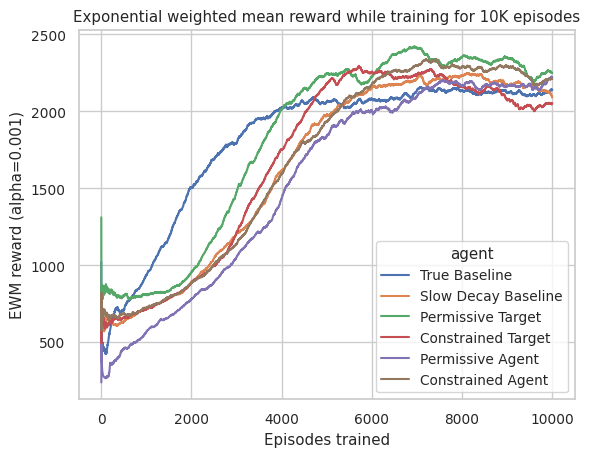

In [328]:
sns.set(font_scale=0.9)
sns.set_style("whitegrid")
sns.lineplot(x='episode', 
             y='ewm_reward_001', 
             data=df_train_10000eps, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Permissive Target', 'Constrained Target', 'Permissive Agent', 'Constrained Agent']
             ).set(xlabel="Episodes trained", ylabel="EWM reward (alpha=0.001)")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend(title='agent')
plt.savefig("./training_rewards_10K.png", bbox_inches='tight')
#plt.title(label="Exponential weighted mean reward while training for 10K episodes", loc='center', wrap=True)
#plt.savefig("./training_rewards_10K.pdf", format='pdf', bbox_inches='tight')

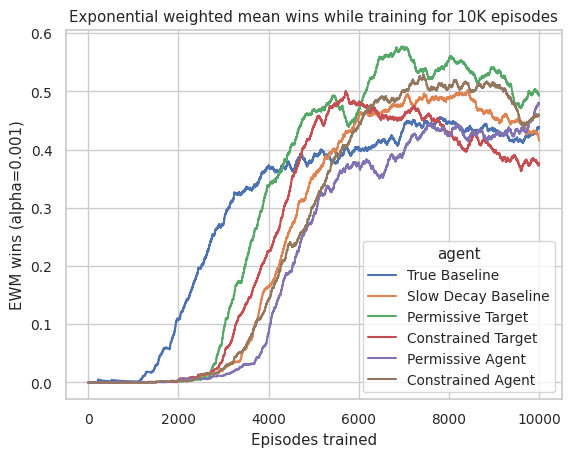

In [329]:
sns.lineplot(x='episode', 
             y='ewm_wins_001', 
             data=df_train_10000eps, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Permissive Target', 'Constrained Target', 'Permissive Agent', 'Constrained Agent']
             ).set(xlabel="Episodes trained", ylabel="EWM wins (alpha=0.001)")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend(title='agent')
plt.savefig("./training_wins_10K.png", bbox_inches='tight')
#plt.title(label="Exponential weighted mean wins while training for 10K episodes", loc='center', wrap=True)
#plt.savefig("./training_wins_10K.pdf", format='pdf', bbox_inches='tight')

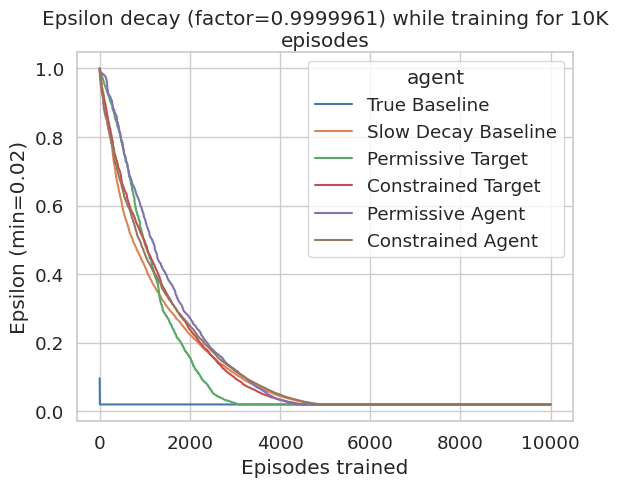

In [330]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.lineplot(x='episode', 
             y='epsilon', 
             data=df_train_10000eps, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Permissive Target', 'Constrained Target', 'Permissive Agent', 'Constrained Agent']
             ).set(xlabel="Episodes trained", ylabel="Epsilon (min=0.02)")
plt.legend(title='agent')
plt.savefig("./training_decay_10K.png", bbox_inches='tight')
#plt.title(label="Epsilon decay (factor=0.9999961) while training for 10K episodes", loc='center', wrap=True)
#plt.savefig("./training_decay_10K.pdf", format='pdf', bbox_inches='tight')

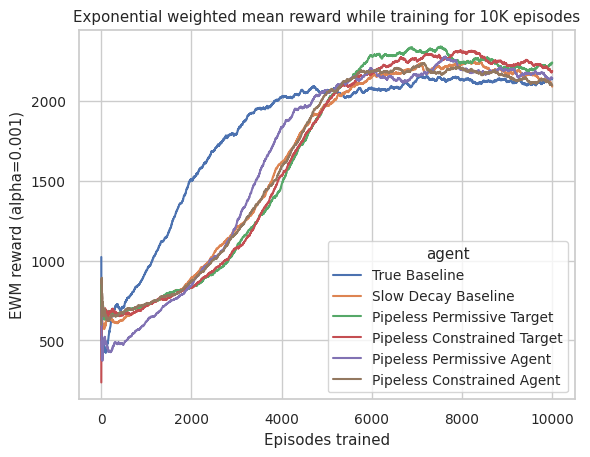

In [331]:
sns.set(font_scale=0.9)
sns.set_style("whitegrid")
sns.lineplot(x='episode', 
             y='ewm_reward_001', 
             data=df_train_10000eps_discriminative, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Pipeless Permissive Target', 'Pipeless Constrained Target', 'Pipeless Permissive Agent', 'Pipeless Constrained Agent']
             ).set(xlabel="Episodes trained", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_rewards_10K_ext.png", bbox_inches='tight')
#plt.title(label="Exponential weighted mean reward while training for 10K episodes", loc='center', wrap=True)
#plt.savefig("./training_rewards_10K_ext.pdf", format='pdf', bbox_inches='tight')

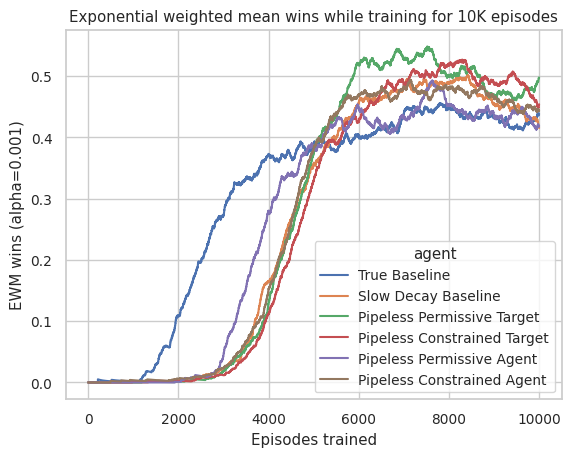

In [332]:
sns.lineplot(x='episode', 
             y='ewm_wins_001', 
             data=df_train_10000eps_discriminative, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Pipeless Permissive Target', 'Pipeless Constrained Target', 'Pipeless Permissive Agent', 'Pipeless Constrained Agent']           
             ).set(xlabel="Episodes trained", ylabel="EWM wins (alpha=0.001)")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend(title='agent')
plt.savefig("./training_wins_10K_ext.png", bbox_inches='tight')
#plt.title(label="Exponential weighted mean wins while training for 10K episodes", loc='center', wrap=True)
#plt.savefig("./training_wins_10K_ext.pdf", format='pdf', bbox_inches='tight')

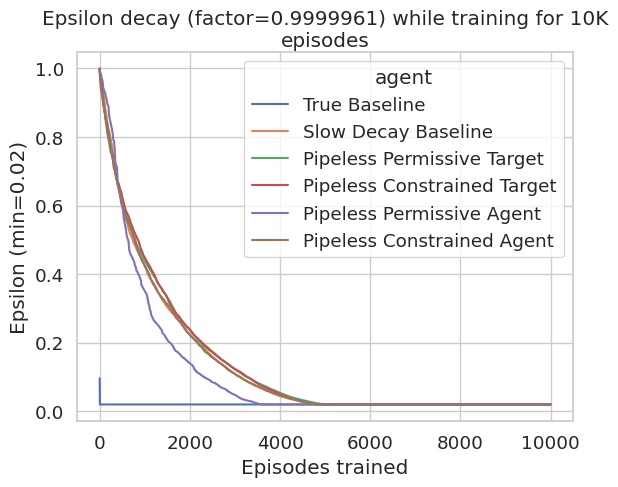

In [333]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.lineplot(x='episode', 
             y='epsilon', 
             data=df_train_10000eps_discriminative, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Pipeless Permissive Target', 'Pipeless Constrained Target', 'Pipeless Permissive Agent', 'Pipeless Constrained Agent']
             ).set(xlabel="Episodes trained", ylabel="Epsilon (min=0.02)")
plt.legend(title='agent')
plt.savefig("./training_decay_10K_ext.png", bbox_inches='tight')
#plt.title(label="Epsilon decay (factor=0.9999961) while training for 10K episodes", loc='center', wrap=True)
#plt.savefig("./training_decay_10K_ext.pdf", format='pdf', bbox_inches='tight')

In [334]:
# take the full length of B1 and B2 and compare to T1_ni, T1_ext_ni, T2_ni and C1_ni
concatenated_winners = pd.concat([
    df_train_10000eps_all[df_train_10000eps_all['model_id'] == 'True Baseline'], 
    df_train_10000eps_all[df_train_10000eps_all['model_id'] == 'Slow Decay Baseline'],  
    df_train_10000eps_all[df_train_10000eps_all['model_id'] == 'Permissive Target'], 
    df_train_10000eps_all[df_train_10000eps_all['model_id'] == 'Constrained Target'], 
    df_train_10000eps_all[df_train_10000eps_all['model_id'] == 'Permissive Agent'], 
    df_train_10000eps_all[df_train_10000eps_all['model_id'] == 'Constrained Agent'], 
    df_train_10000eps_discriminative_all[df_train_10000eps_discriminative_all['model_id'] == 'Pipeless Permissive Target'],
    df_train_10000eps_discriminative_all[df_train_10000eps_discriminative_all['model_id'] == 'Pipeless Constrained Target'],
    df_train_10000eps_discriminative_all[df_train_10000eps_discriminative_all['model_id'] == 'Pipeless Permissive Agent'],
    df_train_10000eps_discriminative_all[df_train_10000eps_discriminative_all['model_id'] == 'Pipeless Constrained Agent']
])
concatenated_winners['total_steps_mio'] = concatenated_winners['total_steps'] / 1000000

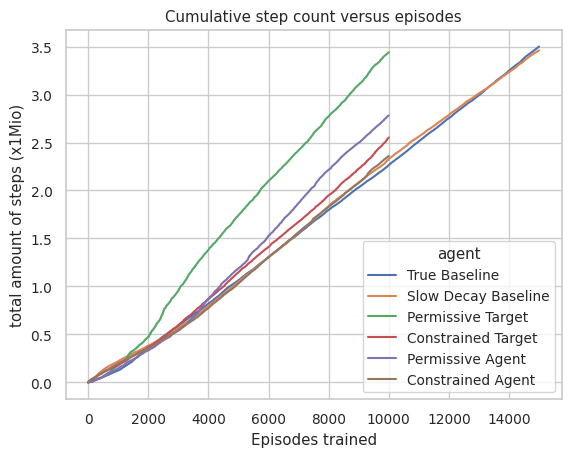

In [335]:
# plot the cumulative step count per episode per agent, to illustrate the step-episode thing
sns.set(font_scale=0.9)
sns.set_style("whitegrid")
sns.lineplot(x='episode', 
             y='total_steps_mio', 
             data=concatenated_winners, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Permissive Target', 'Constrained Target', 'Permissive Agent', 'Constrained Agent']
             ).set(xlabel="Episodes trained", ylabel="total amount of steps (x1Mio)")
plt.legend(title='agent')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig("./training_winners_cumulative_steps.png", bbox_inches='tight')
#plt.title(label="Cumulative step count versus episodes", loc='center', wrap=True)
#plt.savefig("./training_winners_cumulative_steps.pdf", format='pdf', bbox_inches='tight')

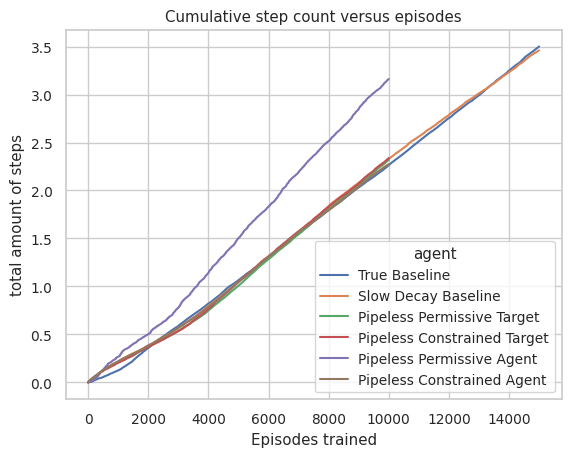

In [336]:
# plot the cumulative step count per episode per agent, to illustrate the step-episode thing
sns.lineplot(x='episode', 
             y='total_steps_mio', 
             data=concatenated_winners, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Pipeless Permissive Target', 'Pipeless Constrained Target', 'Pipeless Permissive Agent', 'Pipeless Constrained Agent']
             ).set(xlabel="Episodes trained", ylabel="total amount of steps")
plt.legend(title='agent')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig("./training_winners_cumulative_steps_ext.png", bbox_inches='tight')
#plt.title(label="Cumulative step count versus episodes", loc='center', wrap=True)
#plt.savefig("./training_winners_cumulative_steps_ext.pdf", format='pdf', bbox_inches='tight')

In [337]:
# find out what the final step count for each agent was
final_step_count = concatenated_winners.groupby(['model_id'], as_index=False)['total_steps'].max()
final_step_count.head(15)

,model_id,total_steps
0,Constrained Agent,2360013
1,Constrained Target,2552335
2,Permissive Agent,2781993
3,Permissive Target,3441229
4,Pipeless Constrained Agent,2274553
5,Pipeless Constrained Target,2338741
6,Pipeless Permissive Agent,3160920
7,Pipeless Permissive Target,2320863
8,Slow Decay Baseline,3459373
9,True Baseline,3500765


In [338]:
# now compare the winner individually with the baselines capped to the same amount of steps
concatenated_winners_T1_ni = concatenated_winners[concatenated_winners['total_steps'] <= 3441229]
concatenated_winners_T2_ni = concatenated_winners[concatenated_winners['total_steps'] <= 2552335]
concatenated_winners_P1_ni = concatenated_winners[concatenated_winners['total_steps'] <= 2781993]
concatenated_winners_C1_ni = concatenated_winners[concatenated_winners['total_steps'] <= 2360013]
concatenated_winners_T1_ext_ni = concatenated_winners[concatenated_winners['total_steps'] <= 2320863]
concatenated_winners_T2_ext_ni = concatenated_winners[concatenated_winners['total_steps'] <= 2338741]
concatenated_winners_P1_ext_ni = concatenated_winners[concatenated_winners['total_steps'] <= 3160920]
concatenated_winners_C1_ext_ni = concatenated_winners[concatenated_winners['total_steps'] <= 2274553]

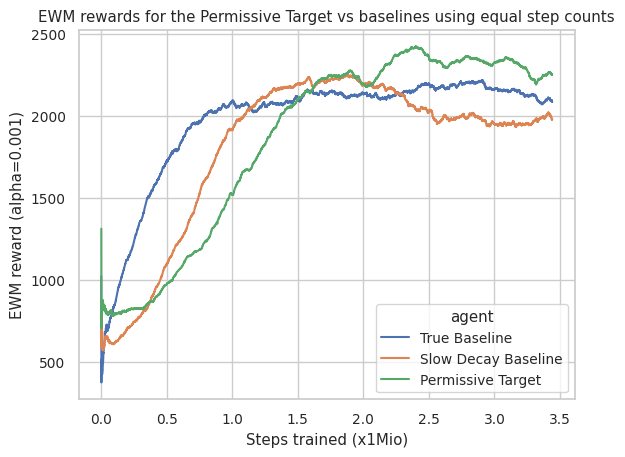

In [339]:
sns.lineplot(x='total_steps_mio', 
             y='ewm_reward_001', 
             data=concatenated_winners_T1_ni, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Permissive Target']
             ).set(xlabel="Steps trained (x1Mio)", ylabel="EWM reward (alpha=0.001)")

plt.legend(title='agent')
plt.savefig("./training_winners_rewards_T1_ni.png", bbox_inches='tight')
#plt.title(label="EWM rewards for the Permissive Target vs baselines using equal step counts", loc='center', wrap=True)
#plt.savefig("./training_winners_rewards_T1_ni.pdf", format='pdf', bbox_inches='tight')

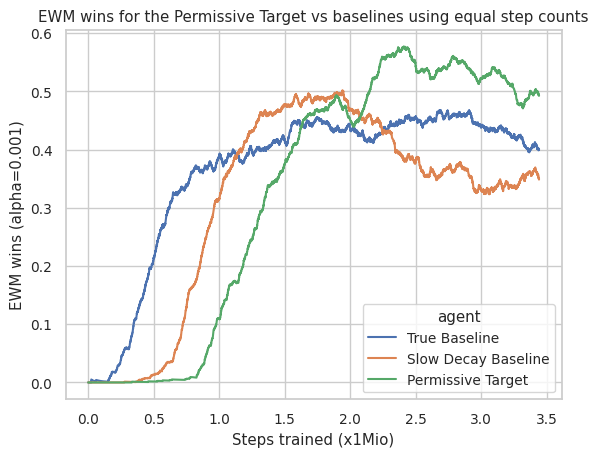

In [340]:
sns.lineplot(x='total_steps_mio', 
             y='ewm_wins_001', 
             data=concatenated_winners_T1_ni, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Permissive Target']           
             ).set(xlabel="Steps trained (x1Mio)", ylabel="EWM wins (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_wins_T1_ni.png", bbox_inches='tight')
#plt.title(label="EWM wins for the Permissive Target vs baselines using equal step counts", loc='center', wrap=True)
#plt.savefig("./training_winners_wins_T1_ni.pdf", format='pdf', bbox_inches='tight')

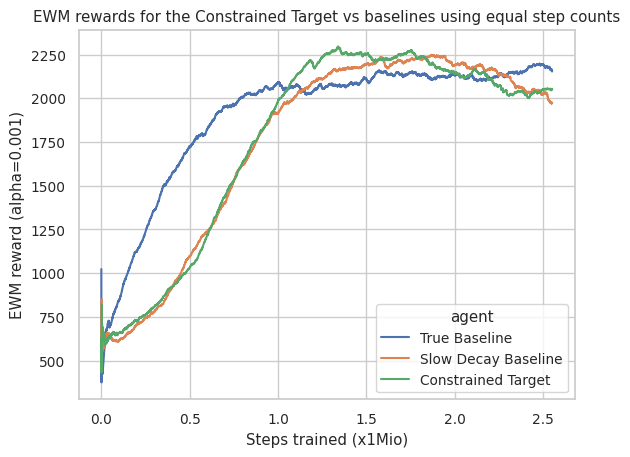

In [341]:
sns.lineplot(x='total_steps_mio', 
             y='ewm_reward_001', 
             data=concatenated_winners_T2_ni, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Constrained Target']
             ).set(xlabel="Steps trained (x1Mio)", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_rewards_T2_ni.png", bbox_inches='tight')
#plt.title(label="EWM rewards for the Constrained Target vs baselines using equal step counts", loc='center', wrap=True)
#plt.savefig("./training_winners_rewards_T2_ni.pdf", format='pdf', bbox_inches='tight')

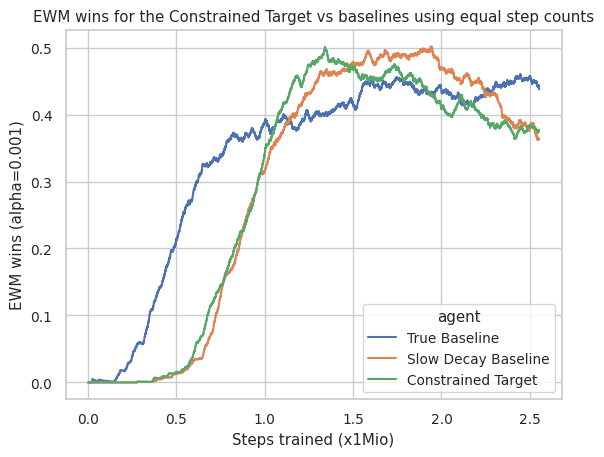

In [342]:
sns.lineplot(x='total_steps_mio', 
             y='ewm_wins_001', 
             data=concatenated_winners_T2_ni, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Constrained Target']           
             ).set(xlabel="Steps trained (x1Mio)", ylabel="EWM wins (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_wins_T2_ni.png", bbox_inches='tight')
#plt.title(label="EWM wins for the Constrained Target vs baselines using equal step counts", loc='center', wrap=True)
#plt.savefig("./training_winners_wins_T2_ni.pdf", format='pdf', bbox_inches='tight')

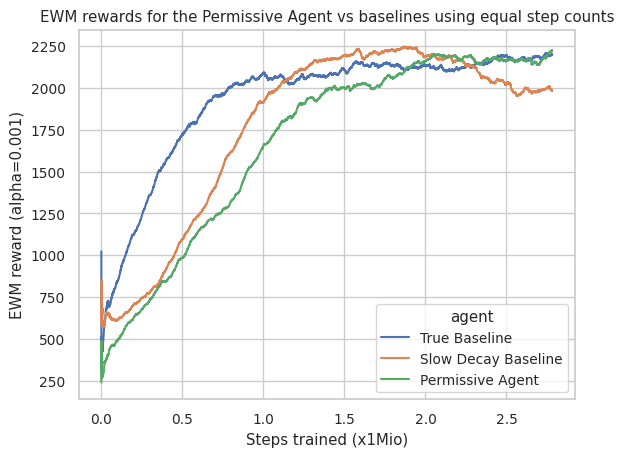

In [343]:
sns.lineplot(x='total_steps_mio', 
             y='ewm_reward_001', 
             data=concatenated_winners_P1_ni, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Permissive Agent']
             ).set(xlabel="Steps trained (x1Mio)", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_rewards_P1_ni.png", bbox_inches='tight')
#plt.title(label="EWM rewards for the Permissive Agent vs baselines using equal step counts", loc='center', wrap=True)
#plt.savefig("./training_winners_rewards_P1_ni.pdf", format='pdf', bbox_inches='tight')

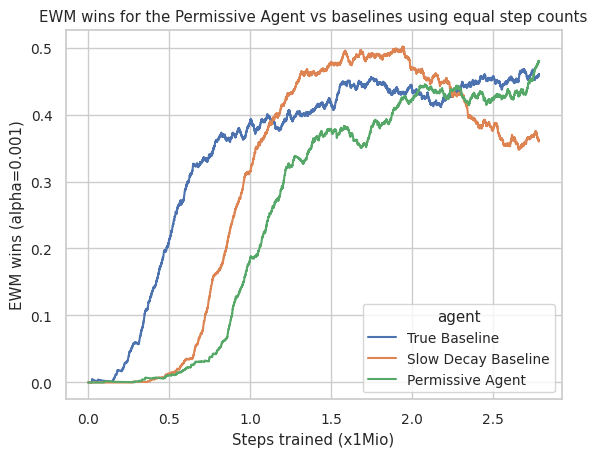

In [344]:
sns.lineplot(x='total_steps_mio', 
             y='ewm_wins_001', 
             data=concatenated_winners_P1_ni, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Permissive Agent']           
             ).set(xlabel="Steps trained (x1Mio)", ylabel="EWM wins (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_wins_P1_ni.png", bbox_inches='tight')
#plt.title(label="EWM wins for the Permissive Agent vs baselines using equal step counts", loc='center', wrap=True)
#plt.savefig("./training_winners_wins_P1_ni.pdf", format='pdf', bbox_inches='tight')

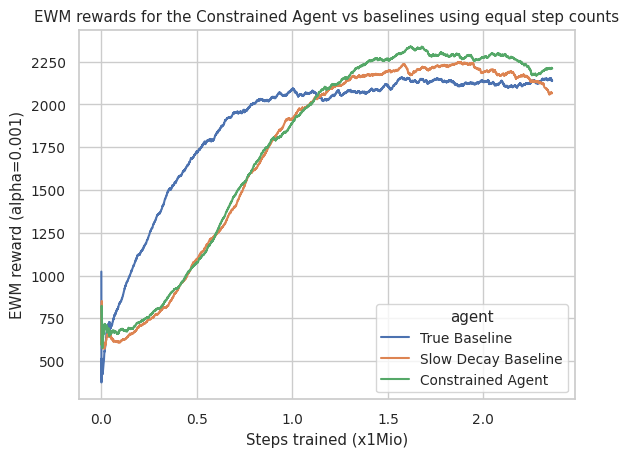

In [345]:
sns.lineplot(x='total_steps_mio', 
             y='ewm_reward_001', 
             data=concatenated_winners_C1_ni, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Constrained Agent']
             ).set(xlabel="Steps trained (x1Mio)", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_rewards_C1_ni.png", bbox_inches='tight')
#plt.title(label="EWM rewards for the Constrained Agent vs baselines using equal step counts", loc='center', wrap=True)
#plt.savefig("./training_winners_rewards_C1_ni.pdf", format='pdf', bbox_inches='tight')

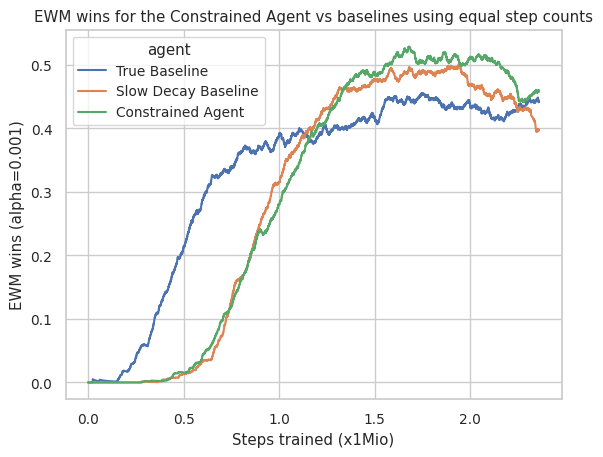

In [346]:
sns.lineplot(x='total_steps_mio', 
             y='ewm_wins_001', 
             data=concatenated_winners_C1_ni, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Constrained Agent']           
             ).set(xlabel="Steps trained (x1Mio)", ylabel="EWM wins (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_wins_C1_ni.png", bbox_inches='tight')
#plt.title(label="EWM wins for the Constrained Agent vs baselines using equal step counts", loc='center', wrap=True)
#plt.savefig("./training_winners_wins_C1_ni.pdf", format='pdf', bbox_inches='tight')

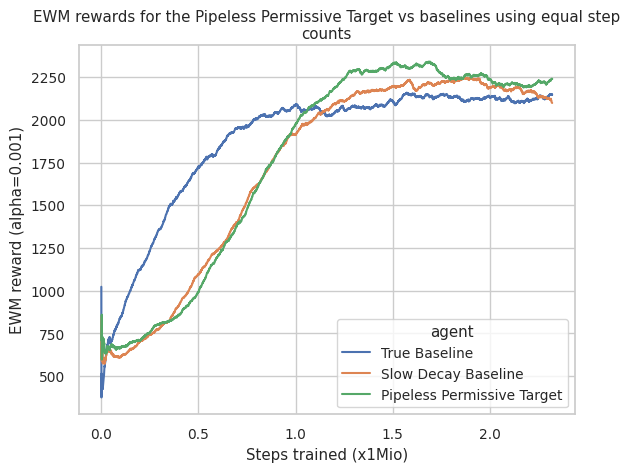

In [347]:
sns.lineplot(x='total_steps_mio', 
             y='ewm_reward_001', 
             data=concatenated_winners_T1_ext_ni, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Pipeless Permissive Target']
             ).set(xlabel="Steps trained (x1Mio)", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_rewards_T1_ext_ni.png", bbox_inches='tight')
#plt.title(label="EWM rewards for the Pipeless Permissive Target vs baselines using equal step counts", loc='center', wrap=True)
#plt.savefig("./training_winners_rewards_T1_ext_ni.pdf", format='pdf', bbox_inches='tight')

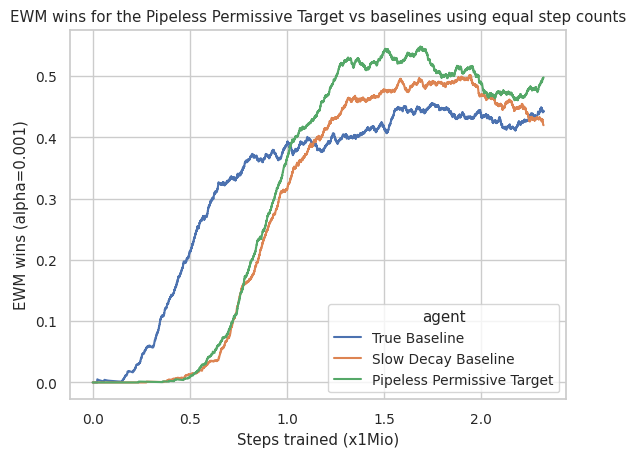

In [348]:
sns.lineplot(x='total_steps_mio', 
             y='ewm_wins_001', 
             data=concatenated_winners_T1_ext_ni, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Pipeless Permissive Target']           
             ).set(xlabel="Steps trained (x1Mio)", ylabel="EWM wins (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_wins_T1_ext_ni.png", bbox_inches='tight')
#plt.title(label="EWM wins for the Pipeless Permissive Target vs baselines using equal step counts", loc='center', wrap=True)
#plt.savefig("./training_winners_wins_T1_ext_ni.pdf", format='pdf', bbox_inches='tight')

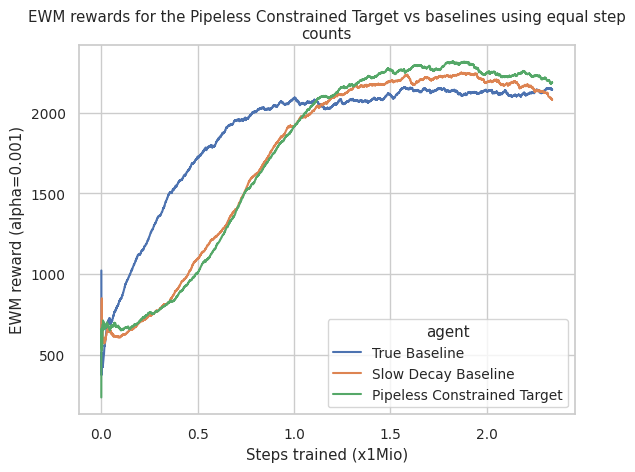

In [349]:
sns.lineplot(x='total_steps_mio', 
             y='ewm_reward_001', 
             data=concatenated_winners_T2_ext_ni, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Pipeless Constrained Target']
             ).set(xlabel="Steps trained (x1Mio)", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_rewards_T2_ext_ni.png", bbox_inches='tight')
#plt.title(label="EWM rewards for the Pipeless Constrained Target vs baselines using equal step counts", loc='center', wrap=True)
#plt.savefig("./training_winners_rewards_T2_ext_ni.pdf", format='pdf', bbox_inches='tight')

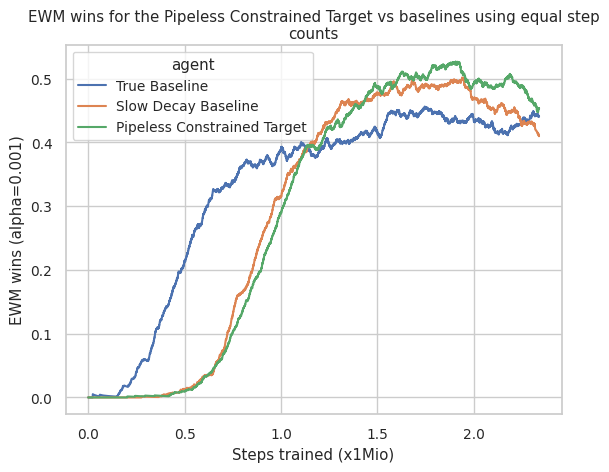

In [350]:
sns.lineplot(x='total_steps_mio', 
             y='ewm_wins_001', 
             data=concatenated_winners_T2_ext_ni, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Pipeless Constrained Target']           
             ).set(xlabel="Steps trained (x1Mio)", ylabel="EWM wins (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_wins_T2_ext_ni.png", bbox_inches='tight')
#plt.title(label="EWM wins for the Pipeless Constrained Target vs baselines using equal step counts", loc='center', wrap=True)
#plt.savefig("./training_winners_wins_T2_ext_ni.pdf", format='pdf', bbox_inches='tight')

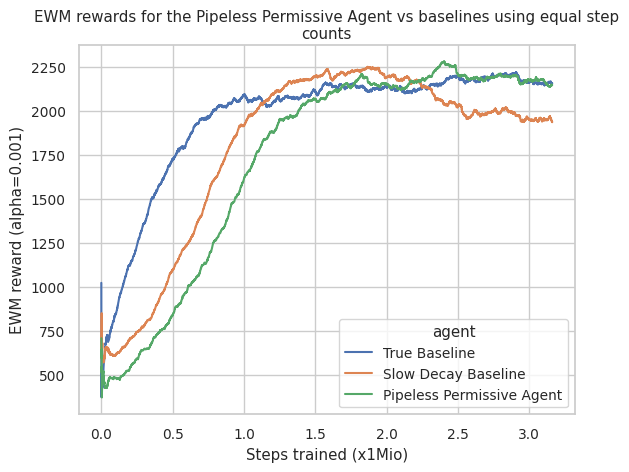

In [351]:
sns.lineplot(x='total_steps_mio', 
             y='ewm_reward_001', 
             data=concatenated_winners_P1_ext_ni, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Pipeless Permissive Agent']
             ).set(xlabel="Steps trained (x1Mio)", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_rewards_P1_ext_ni.png", bbox_inches='tight')
#plt.title(label="EWM rewards for the Pipeless Permissive Agent vs baselines using equal step counts", loc='center', wrap=True)
#plt.savefig("./training_winners_rewards_P1_ext_ni.pdf", format='pdf', bbox_inches='tight')

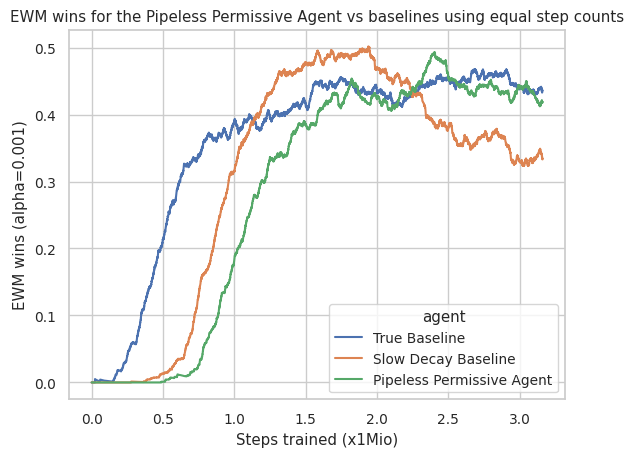

In [352]:
sns.lineplot(x='total_steps_mio', 
             y='ewm_wins_001', 
             data=concatenated_winners_P1_ext_ni, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Pipeless Permissive Agent']           
             ).set(xlabel="Steps trained (x1Mio)", ylabel="EWM wins (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_wins_P1_ext_ni.png", bbox_inches='tight')
#plt.title(label="EWM wins for the Pipeless Permissive Agent vs baselines using equal step counts", loc='center', wrap=True)
#plt.savefig("./training_winners_wins_P1_ext_ni.pdf", format='pdf', bbox_inches='tight')

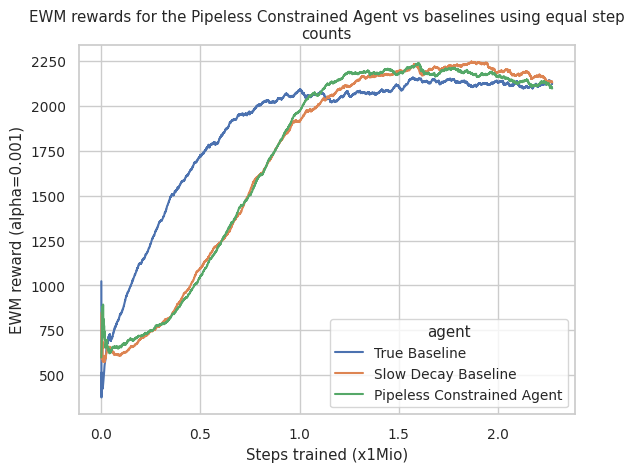

In [353]:
sns.lineplot(x='total_steps_mio', 
             y='ewm_reward_001', 
             data=concatenated_winners_C1_ext_ni, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Pipeless Constrained Agent']
             ).set(xlabel="Steps trained (x1Mio)", ylabel="EWM reward (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_rewards_C1_ext_ni.png", bbox_inches='tight')
#plt.title(label="EWM rewards for the Pipeless Constrained Agent vs baselines using equal step counts", loc='center', wrap=True)
#plt.savefig("./training_winners_rewards_C1_ext_ni.pdf", format='pdf', bbox_inches='tight')

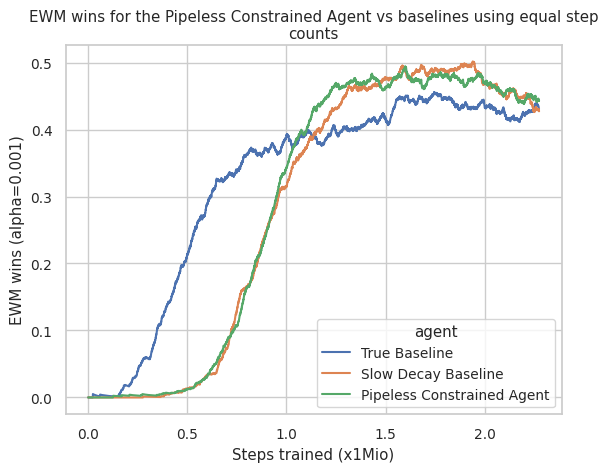

In [354]:
sns.lineplot(x='total_steps_mio', 
             y='ewm_wins_001', 
             data=concatenated_winners_C1_ext_ni, 
             hue='model_id',
             hue_order=['True Baseline', 'Slow Decay Baseline', 'Pipeless Constrained Agent']           
             ).set(xlabel="Steps trained (x1Mio)", ylabel="EWM wins (alpha=0.001)")
plt.legend(title='agent')
plt.savefig("./training_winners_wins_C1_ext_ni.png", bbox_inches='tight')
#plt.title(label="EWM wins for the Pipeless Constrained Agent vs baselines using equal step counts", loc='center', wrap=True)
#plt.savefig("./training_winners_wins_C1_ext_ni.pdf", format='pdf', bbox_inches='tight')